Installing Necesarry Libraries

### Importing Necessary Libraries
This section imports all the required libraries for data manipulation, visualization, and machine learning.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
import scipy.stats as stat
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score,mean_squared_error, r2_score
from datetime import timedelta





### Loading and Preparing the Data
In this step, we load the data and prepare it for analysis by handling missing values or encoding features.

Processing Raw Datas

### Exploratory Data Analysis (EDA)
The EDA helps in understanding the data distribution, identifying patterns, and detecting any outliers.

Sleep Data

### Machine Learning Model
This part splits the data into training and testing sets and then applies a RandomForest model.

In [3]:
input_file = 'sleepDataRaw.csv'
output_file = 'sleepData.csv'

df = pd.read_csv(input_file)

df['_startDate'] = pd.to_datetime(df['_startDate'])
df['_endDate'] = pd.to_datetime(df['_endDate'])

cutoff_time = timedelta(hours=4)

df['adjusted_start'] = df['_startDate'] - cutoff_time
df['adjusted_end'] = df['_endDate'] - cutoff_time
df['adjusted_date'] = df['adjusted_start'].dt.date

df['sleep_duration'] = ((df['_endDate'] - df['_startDate']).dt.total_seconds() / 3600).round(2)

daily_sleep = df.groupby('adjusted_date').agg(
    total_sleep_hours=('sleep_duration', 'sum'),
    sleep_start=('adjusted_start', 'min'),
    wake_up=('adjusted_end', 'max')
).reset_index()

daily_sleep.rename(columns={'adjusted_date': 'date'}, inplace=True)


daily_sleep['sleep_start'] = daily_sleep['sleep_start'] + cutoff_time
daily_sleep['wake_up'] = daily_sleep['wake_up'] + cutoff_time


daily_sleep.to_csv(output_file, index=False)

print(f"Sleep hours, start times, and wake-up times have been calculated and saved to '{output_file}'.")


Sleep hours, start times, and wake-up times have been calculated and saved to 'sleepData.csv'.


### Evaluation of Model Performance
In this step, the trained model is evaluated using different metrics like accuracy, precision, recall, etc.

Screen Time and Good Apps

### Conclusion
This section summarizes the results of the model and possible future improvements.

In [4]:
import pandas as pd

data = pd.read_csv('screenDataRaw.csv')

data['date'] = pd.to_datetime(data['start_time']).dt.date

data['good_app'] = data['good_app'].fillna(0)
grouped = data.groupby('date').agg(
    total_usage=('usage', 'sum'),
    good_app_usage=('usage', lambda x: x[data['good_app'] == 1].sum()),
    bad_app_usage=('usage', lambda x: x[data['good_app'] == 0].sum())
).reset_index()

grouped['efficient_time'] = grouped['good_app_usage'] / grouped['total_usage']

grouped.to_csv('screenData.csv', index=False)

print("Efficient time and bad app usage calculated and saved to 'screenData.csv'")


Efficient time and bad app usage calculated and saved to 'screenData.csv'


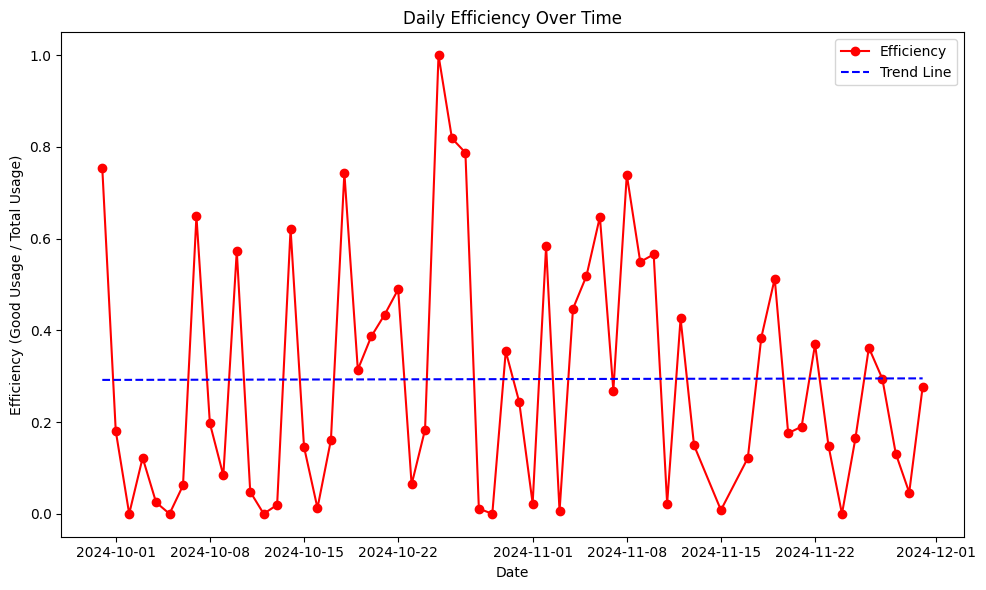

In [5]:
grouped['date_numeric'] = range(len(grouped['date']))

coefficients = np.polyfit(grouped['date_numeric'], grouped['efficient_time'], deg=1)
trend_line = np.polyval(coefficients, grouped['date_numeric'])


plt.figure(figsize=(10, 6))
plt.plot(grouped['date'], grouped['efficient_time'], marker='o', color='red', label='Efficiency')


plt.plot(grouped['date'], trend_line, color='blue', linestyle='--', label='Trend Line')


plt.xlabel('Date')
plt.ylabel('Efficiency (Good Usage / Total Usage)')
plt.title('Daily Efficiency Over Time')



plt.legend()
plt.tight_layout()
plt.show()

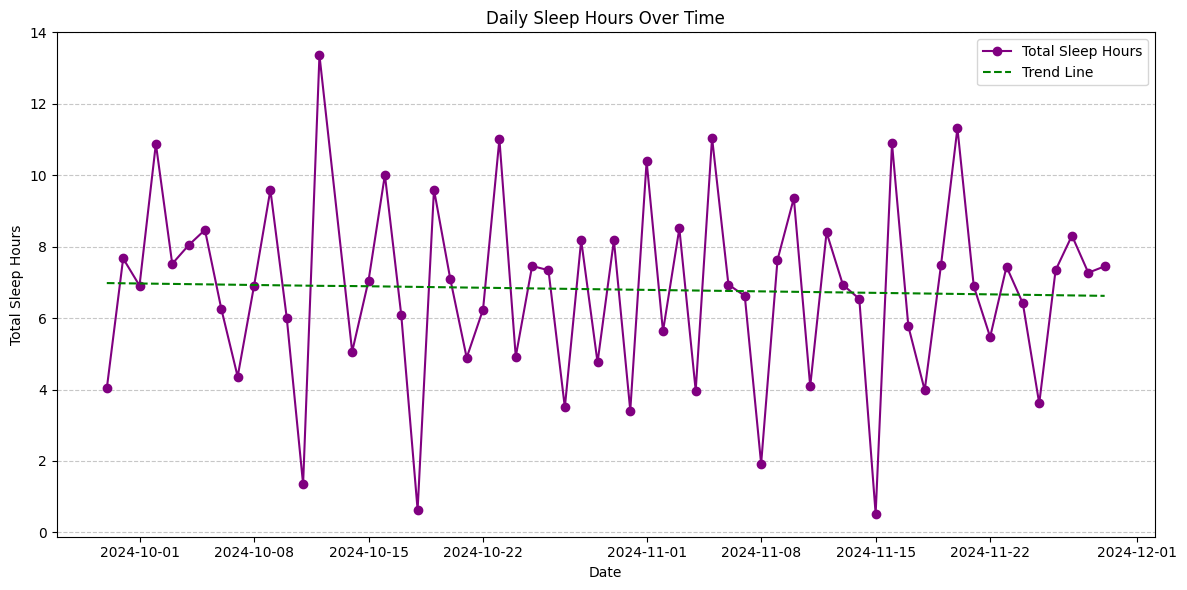

In [6]:
daily_sleep['date'] = pd.to_datetime(daily_sleep['date']).dt.date

daily_sleep['date_numeric'] = range(len(daily_sleep['date']))

coefficients = np.polyfit(daily_sleep['date_numeric'], daily_sleep['total_sleep_hours'], deg=1)
trend_line = np.polyval(coefficients, daily_sleep['date_numeric'])

plt.figure(figsize=(12, 6))
plt.plot(daily_sleep['date'], daily_sleep['total_sleep_hours'], marker='o', color='purple', label='Total Sleep Hours')

plt.plot(daily_sleep['date'], trend_line, color='green', linestyle='--', label='Trend Line')

plt.xlabel('Date')
plt.ylabel('Total Sleep Hours')
plt.title('Daily Sleep Hours Over Time')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-7-fcf1387183b1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data['wake_up_deviation'] = pd.to_datetime(heatmap_data['wake_up_deviation']).dt.hour + pd.to_datetime(heatmap_data['wake_up_deviation']).dt.minute / 60
<ipython-input-7-fcf1387183b1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data['sleep_start_deviation'] = pd.to_datetime(heatmap_data['sleep_start_deviation']).dt.hour + pd.to_datetime(heatmap_data['sleep_start_deviation']).dt.minute / 60


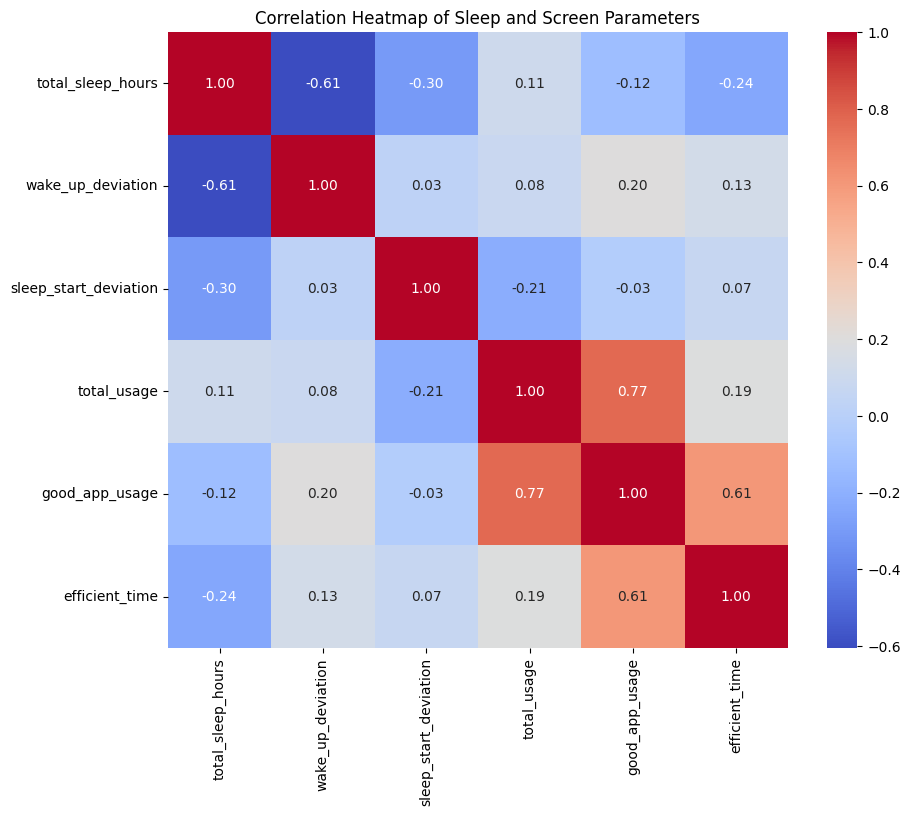

In [7]:
df = daily_sleep.merge(grouped, on='date', how='inner')

df['sleep_start_hours'] = df['sleep_start'].dt.hour + df['sleep_start'].dt.minute / 60 + df['sleep_start'].dt.second / 3600
df['wake_up_hours'] = df['wake_up'].dt.hour + df['wake_up'].dt.minute / 60 + df['wake_up'].dt.second / 3600

mean_sleep_start = df['sleep_start_hours'].mean()
mean_wake_up = df['wake_up_hours'].mean()

df['sleep_start_deviation'] = df['sleep_start_hours'] - mean_sleep_start
df['wake_up_deviation'] = df['wake_up_hours'] - mean_wake_up

df.drop(['sleep_start_hours', 'wake_up_hours'], axis=1, inplace=True)



heatmap_data = df[['total_sleep_hours', 'wake_up_deviation', 'sleep_start_deviation', 'total_usage', 'good_app_usage', 'efficient_time']]

heatmap_data['wake_up_deviation'] = pd.to_datetime(heatmap_data['wake_up_deviation']).dt.hour + pd.to_datetime(heatmap_data['wake_up_deviation']).dt.minute / 60
heatmap_data['sleep_start_deviation'] = pd.to_datetime(heatmap_data['sleep_start_deviation']).dt.hour + pd.to_datetime(heatmap_data['sleep_start_deviation']).dt.minute / 60

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sleep and Screen Parameters')
plt.show()


In [8]:


df_shuffled = shuffle(df, random_state=42)

X = df[["wake_up_deviation", "sleep_start_deviation", "total_sleep_hours", "total_usage"]].astype(float)
y = df[["efficient_time"]].astype(float)

print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

         date  total_sleep_hours               sleep_start  \
0  2024-09-30               7.67 2024-09-30 06:02:03+03:00   
1  2024-10-01               6.91 2024-10-01 08:03:04+03:00   
2  2024-10-02              10.88 2024-10-02 05:54:47+03:00   
3  2024-10-03               7.52 2024-10-04 01:18:52+03:00   
4  2024-10-04               8.04 2024-10-05 00:47:29+03:00   

                    wake_up  date_numeric_x  total_usage  good_app_usage  \
0 2024-10-01 08:03:03+03:00               1         1966            1481   
1 2024-10-02 05:53:18+03:00               2        13934            2519   
2 2024-10-03 08:50:00+03:00               3         6099               0   
3 2024-10-04 08:50:00+03:00               4        12905            1577   
4 2024-10-05 08:50:00+03:00               5         3064              76   

   bad_app_usage  efficient_time  date_numeric_y  sleep_start_deviation  \
0            485        0.753306               0               2.200014   
1          11415    

In [9]:
regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [10]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Root Mean Squared Error: 0.3367844487907777
R-squared: -0.34802801942628525
